<a href="https://colab.research.google.com/github/gauravvxv/Diwali-Sales-Analysis/blob/main/Notebook/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎆**Diwali Sales Analysis Project**

## 📌 **1. Introduction**

In this project, I worked with a messy diwali sales dataset. My goal is to clean the data and explore it using visualization with Matplotlib and seaborn. This helps me to understand sales pattern, prodcut performance, and prepare the data for future analysis.

##📥 **2. Import libraries**

We import necessary libraries for data handling and visualization:


*   `Pandas` for data manipulation
*   `Matplotlib` and `Seaborn` for data visualization



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 📁 **3. Load Dataset**

In [2]:
path = '/content/drive/MyDrive/Diwali Sales Analysis'

In [3]:
df = pd.read_csv(path+'/Diwali Sales Data.csv', encoding= 'unicode_escape')

## 🧐 **4. Exploratory Data Analysis**

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [7]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [8]:
df.shape

(11251, 15)

### After exploring the data, I found that the dataset contains 11251 rows and 15 columns. Among these, two columns `Status` and `unnamed1` are completely null, so we should drop these columns. Additionally, there are 12 missing values in `Amount` column, which we need to remove to ensure data quality.


In [9]:
df = df.drop(columns = ['Status','unnamed1'])

In [10]:
df = df[df['Amount'].notnull()]

In [11]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


## 📊 **5. Visualization of the total number of Females and Males**

In [12]:
male_female = df['Gender'].value_counts().reset_index()
male_female.columns = ['Gender', 'Total']

# Calculate percentage
total_count = male_female['Total'].sum()
male_female['Percent'] = (male_female['Total']/total_count)*100
male_female

,Gender,Total,Percent
0,F,7832,69.685915
1,M,3407,30.314085


Text(0, 0.5, 'Total')

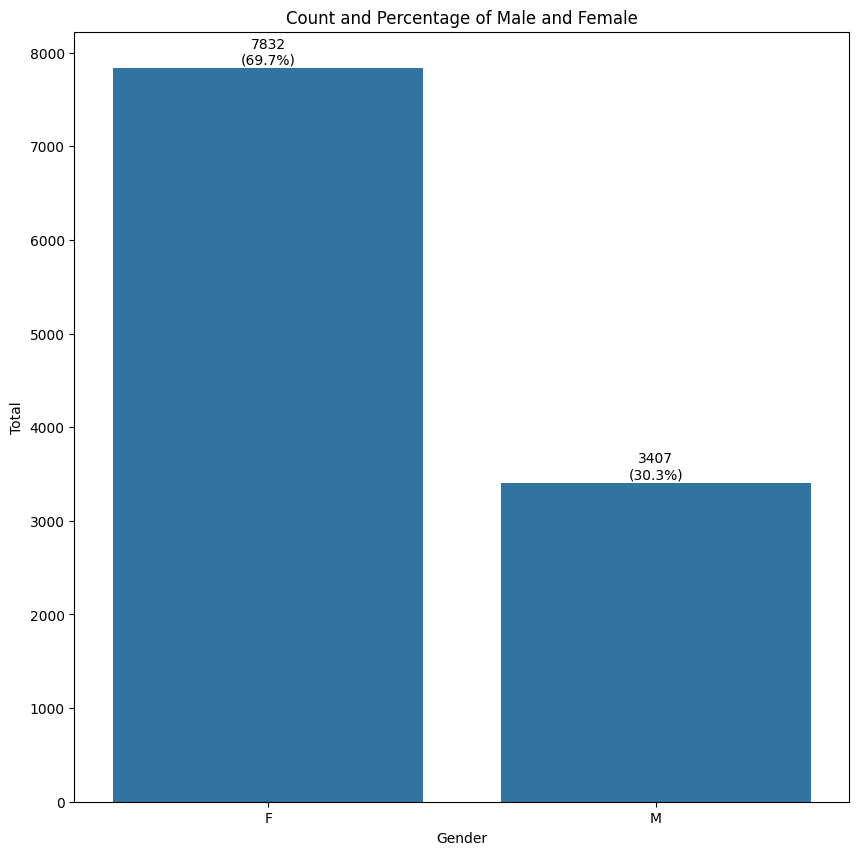

In [13]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Gender', y='Total', data=male_female)

for i,bar in enumerate(ax.patches):
  count = male_female['Total'][i]
  percent = male_female['Percent'][i]

  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + total_count * 0.001,
      f'{count}\n({percent:.1f}%)',
      ha='center',
      va = 'bottom',
      color='black'
  )

plt.title("Count and Percentage of Male and Female")
plt.xlabel("Gender")
plt.ylabel("Total")


## 📊 **6. Visualization of the Most Active Age Group**

In [14]:
active_age = df['Age Group'].value_counts().reset_index()
active_age.columns = ['Age Group', 'Total']
active_age.sort_values(by='Total',ascending=False,inplace=True)
active_age

,Age Group,Total
0,26-35,4541
1,36-45,2283
2,18-25,1879
3,46-50,983
4,51-55,830
5,55+,427
6,0-17,296


Text(0.5, 1.0, 'Most Active Age Groups')

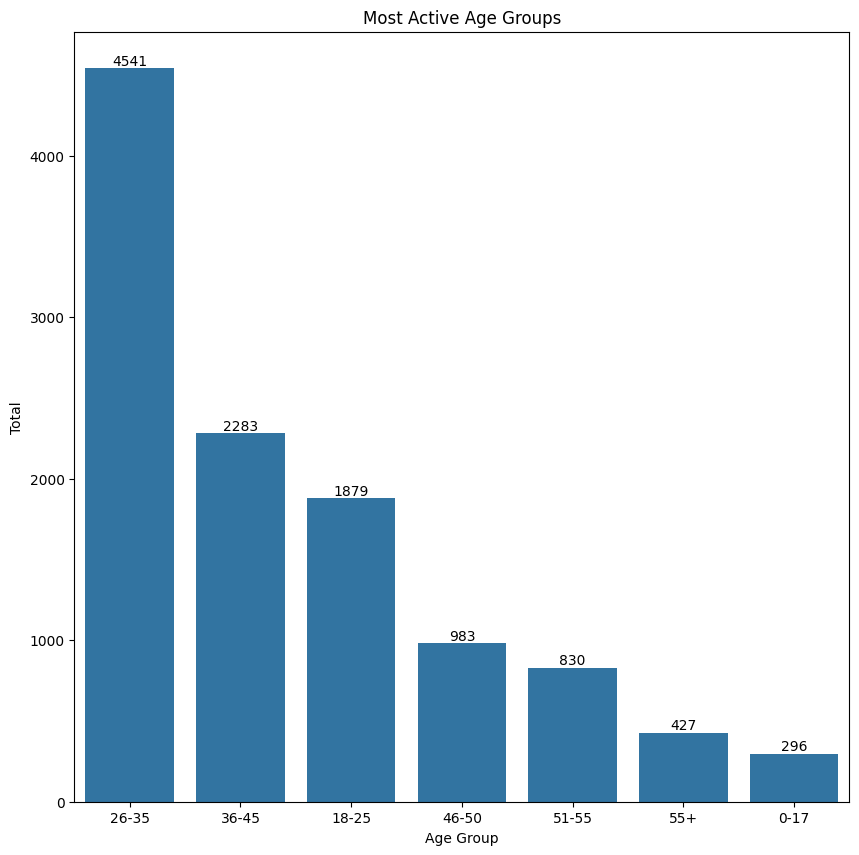

In [15]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Age Group',y='Total',data=active_age)
for i,bar in enumerate(ax.patches):
  count = active_age['Total'][i]
  ax.text(
      bar.get_x() + bar.get_width() /2,
      bar.get_height()+bar.get_width()*0.5,
      f'{count}',
      ha='center',
      va='bottom',
      color='black'
  )
plt.title('Most Active Age Groups')

In [16]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


## 📊 **7. Visualization of Sales Per State**

In [17]:
sales_per_state = df['State'].value_counts().reset_index()
sales_per_state.columns = ['State','Total']

# percentage

total = sales_per_state['Total'].sum()
sales_per_state['Percent'] = (sales_per_state['Total']/total)*100
sales_per_state

,State,Total,Percent
0,Uttar Pradesh,1944,17.296913
1,Maharashtra,1525,13.568823
2,Karnataka,1304,11.602456
3,Delhi,1104,9.822938
4,Madhya Pradesh,921,8.194679
5,Andhra Pradesh,811,7.215944
6,Himachal Pradesh,608,5.409734
7,Kerala,453,4.030608
8,Haryana,452,4.021710
9,Bihar,434,3.861554


Text(0.5, 1.0, 'Sales Per State')

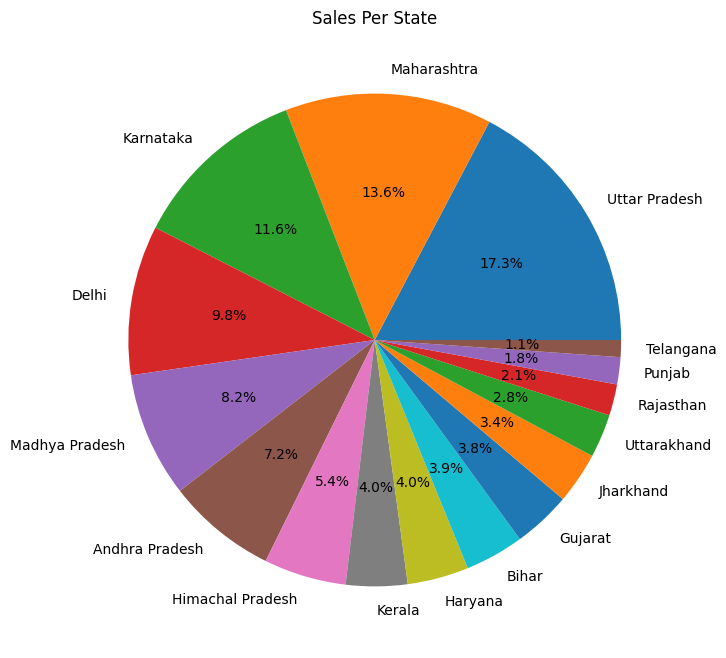

In [18]:
plt.figure(figsize=(10,8))
plt.pie(sales_per_state['Percent'],labels=sales_per_state['State'],autopct='%1.1f%%')
plt.title('Sales Per State')

## 📊 **8. Visualization of Product Catergory Popularity**

In [19]:
products = df['Product_Category'].value_counts().reset_index()
products.columns= ['Product_Catergory','Total']
products

,Product_Catergory,Total
0,Clothing & Apparel,2655
1,Food,2490
2,Electronics & Gadgets,2087
3,Footwear & Shoes,1059
4,Household items,520
5,Beauty,422
6,Games & Toys,386
7,Sports Products,356
8,Furniture,352
9,Pet Care,212


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Clothing & Apparel'),
  Text(1, 0, 'Food'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Household items'),
  Text(5, 0, 'Beauty'),
  Text(6, 0, 'Games & Toys'),
  Text(7, 0, 'Sports Products'),
  Text(8, 0, 'Furniture'),
  Text(9, 0, 'Pet Care'),
  Text(10, 0, 'Office'),
  Text(11, 0, 'Stationery'),
  Text(12, 0, 'Books'),
  Text(13, 0, 'Auto'),
  Text(14, 0, 'Decor'),
  Text(15, 0, 'Veterinary'),
  Text(16, 0, 'Tupperware'),
  Text(17, 0, 'Hand & Power Tools')])

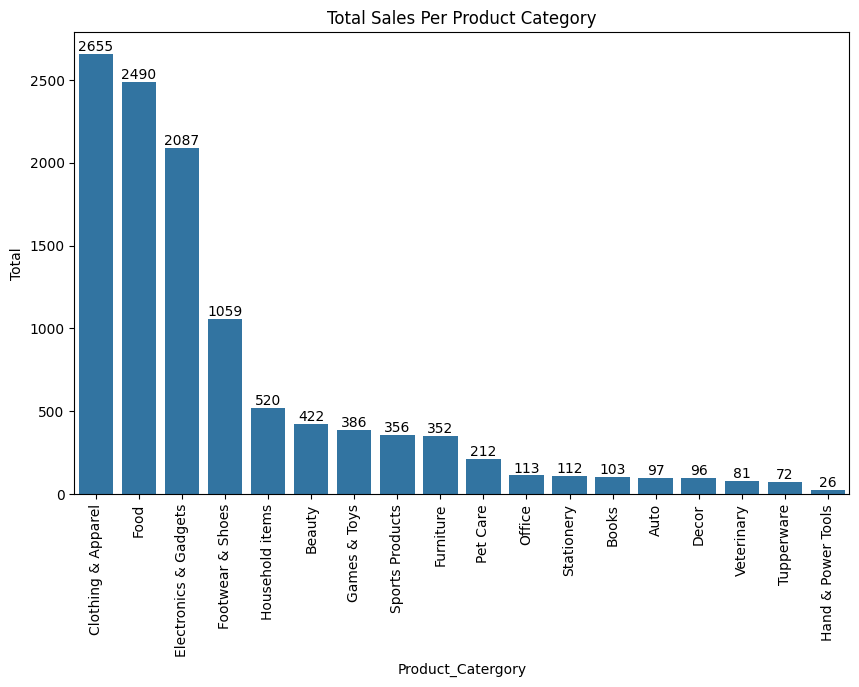

In [20]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Product_Catergory',y='Total',data=products)
plt.title('Total Sales Per Product Category')
for i,bar in enumerate(ax.patches):
  count = products['Total'][i]
  ax.text(
      bar.get_x() + bar.get_width() /2,
      bar.get_height()+bar.get_width()*0.5,
      f'{count}',
      ha='center',
      va='bottom',
      color='black'
  )
plt.xticks(rotation=90)

## 📊 **9. Visualization of Orders by Marital Status**

In [21]:
df['Marital_Status'] = df['Marital_Status'].map({0: 'Unmarried',1: 'Married'})
orders_marital = df.groupby('Marital_Status')['Orders'].sum().reset_index()
orders_marital.columns = ['Marital_Status','Orders']
orders_marital

,Marital_Status,Orders
0,Married,11732
1,Unmarried,16249


Text(0.5, 1.0, 'Distribution of Orders by Marital Status')

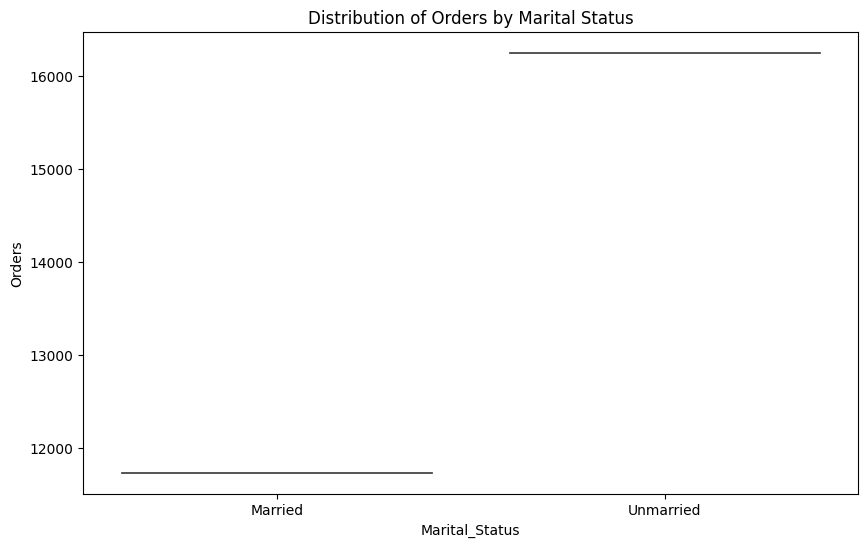

In [22]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(x='Marital_Status',y='Orders',data=orders_marital)
plt.title('Distribution of Orders by Marital Status')

## 📊 **10. Visualization of Sales by Occupation**

In [23]:
amount_occuption = df.groupby('Occupation')['Amount'].sum().reset_index()
amount_occuption.columns = ['Occupation','Total']
amount_occuption

,Occupation,Total
0,Agriculture,2593087.00
1,Automobile,5368596.00
2,Aviation,12602298.00
3,Banking,10770610.95
4,Chemical,5297436.00
5,Construction,3597511.00
6,Food Processing,4070670.00
7,Govt,8517212.00
8,Healthcare,13034587.49
9,Hospitality,6376405.00


Text(0.5, 1.0, 'Total Sales Per Occupation')

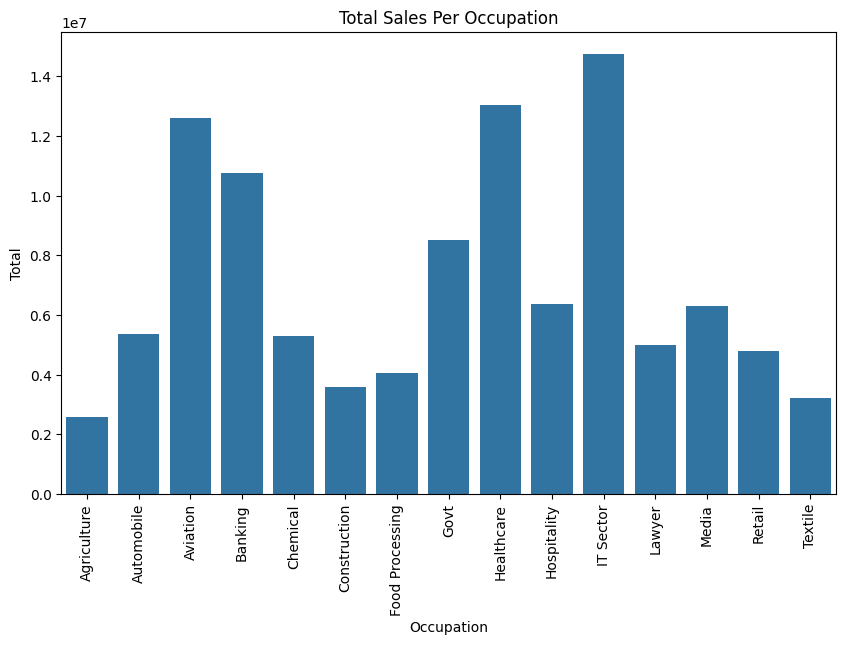

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation',y='Total',data=amount_occuption)
plt.xticks(rotation=90)
plt.title('Total Sales Per Occupation')

## 📊 **11. Visualization of Age Group by spending**

In [34]:
age_amount = df.groupby('Age Group')['Amount'].sum().reset_index()
age_amount.columns = ['Age Group','Amount']
# age_amount.sort_values(by='Amount',ascending=False,inplace=True)
age_amount

,Age Group,Amount
0,0-17,2699653.00
1,18-25,17240732.00
2,26-35,42613443.94
3,36-45,22144995.49
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00


Text(0.5, 1.0, 'Total Sales Per Age Group')

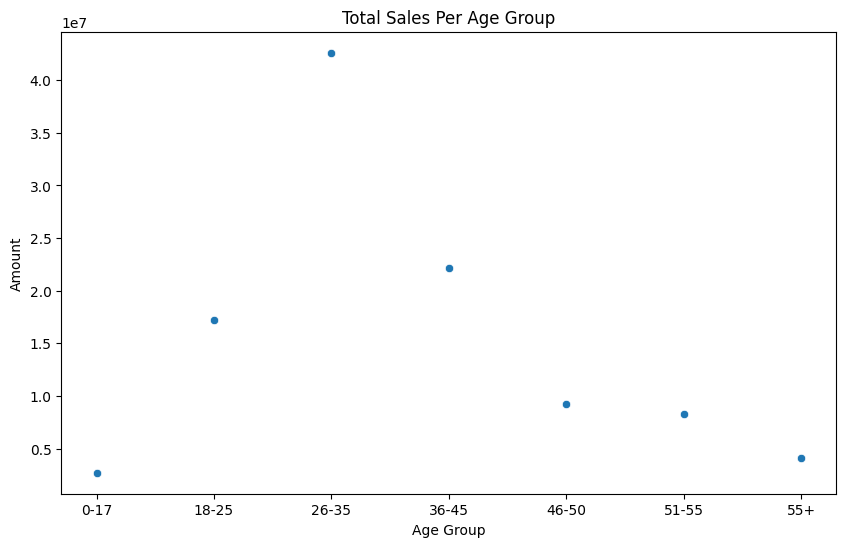

In [39]:
  plt.figure(figsize=(10,6))
  sns.scatterplot(data = age_amount,x='Age Group',y='Amount')
  plt.title('Total Sales Per Age Group')

## 📊 **12. Visualzation of Heatmap of Sales by State and Product Category**

In [48]:
sales_products = df.pivot_table(index='State',values='Amount',columns='Product_Category',aggfunc='sum',fill_value=0)
sales_products

Product_Category,Auto,Beauty,Books,Clothing & Apparel,Decor,Electronics & Gadgets,Food,Footwear & Shoes,Furniture,Games & Toys,Hand & Power Tools,Household items,Office,Pet Care,Sports Products,Stationery,Tupperware,Veterinary
State,,,,,,,,,,,,,,,,,,
Andhra Pradesh,1133837.99,183891.0,38681.0,1029062.0,0.0,2123529.0,2163209.0,301766.00,263128.00,310047.0,107244.0,27444.0,1513.0,21201.0,265384.0,21178.0,46032.0,0.0
Bihar,18609.00,12033.0,7753.0,871072.0,0.0,719131.0,1555848.0,173109.00,204732.00,141391.0,0.0,33872.0,2460.0,19849.0,195739.0,13151.0,54008.0,0.0
Delhi,70154.00,205277.0,78510.0,826301.0,0.0,703706.0,2643627.5,5027449.45,45202.00,209444.0,145388.0,244816.0,46084.0,17631.0,124022.0,1124625.5,58157.0,33425.0
Gujarat,23877.00,15157.0,49198.0,676319.0,0.0,785695.0,1342541.0,124941.00,270591.00,209939.0,0.0,16211.0,967.0,16869.0,250338.0,17058.0,146381.0,0.0
Haryana,0.00,17073.0,13201.0,727706.0,0.0,802198.0,1678205.0,131737.00,244572.00,177333.0,0.0,20117.0,1298.0,28260.0,253591.0,30051.0,90584.0,4249.0
Himachal Pradesh,66439.00,13603.0,96549.0,1445132.0,0.0,1271569.0,728112.0,202206.00,358946.00,431361.0,14627.0,26156.0,1140.0,44670.0,224636.0,29986.0,8236.0,0.0
Jharkhand,61023.00,6033.0,13213.0,901298.0,0.0,913742.0,653929.0,142410.00,97648.00,162591.0,0.0,14576.0,1690.0,12888.0,40527.0,0.0,0.0,4888.0
Karnataka,61680.00,77325.0,395880.0,1385415.0,0.0,499974.0,3995458.0,4963928.00,379797.00,609543.0,0.0,426226.0,3035.0,81154.0,537005.0,47578.0,59542.0,0.0
Kerala,41935.00,32489.0,44402.0,1129045.0,0.0,813203.0,671192.0,129256.00,653023.99,61754.0,0.0,70936.0,2469.0,0.0,21343.0,21246.0,201123.0,1075.0


Text(220.72222222222223, 0.5, 'State')

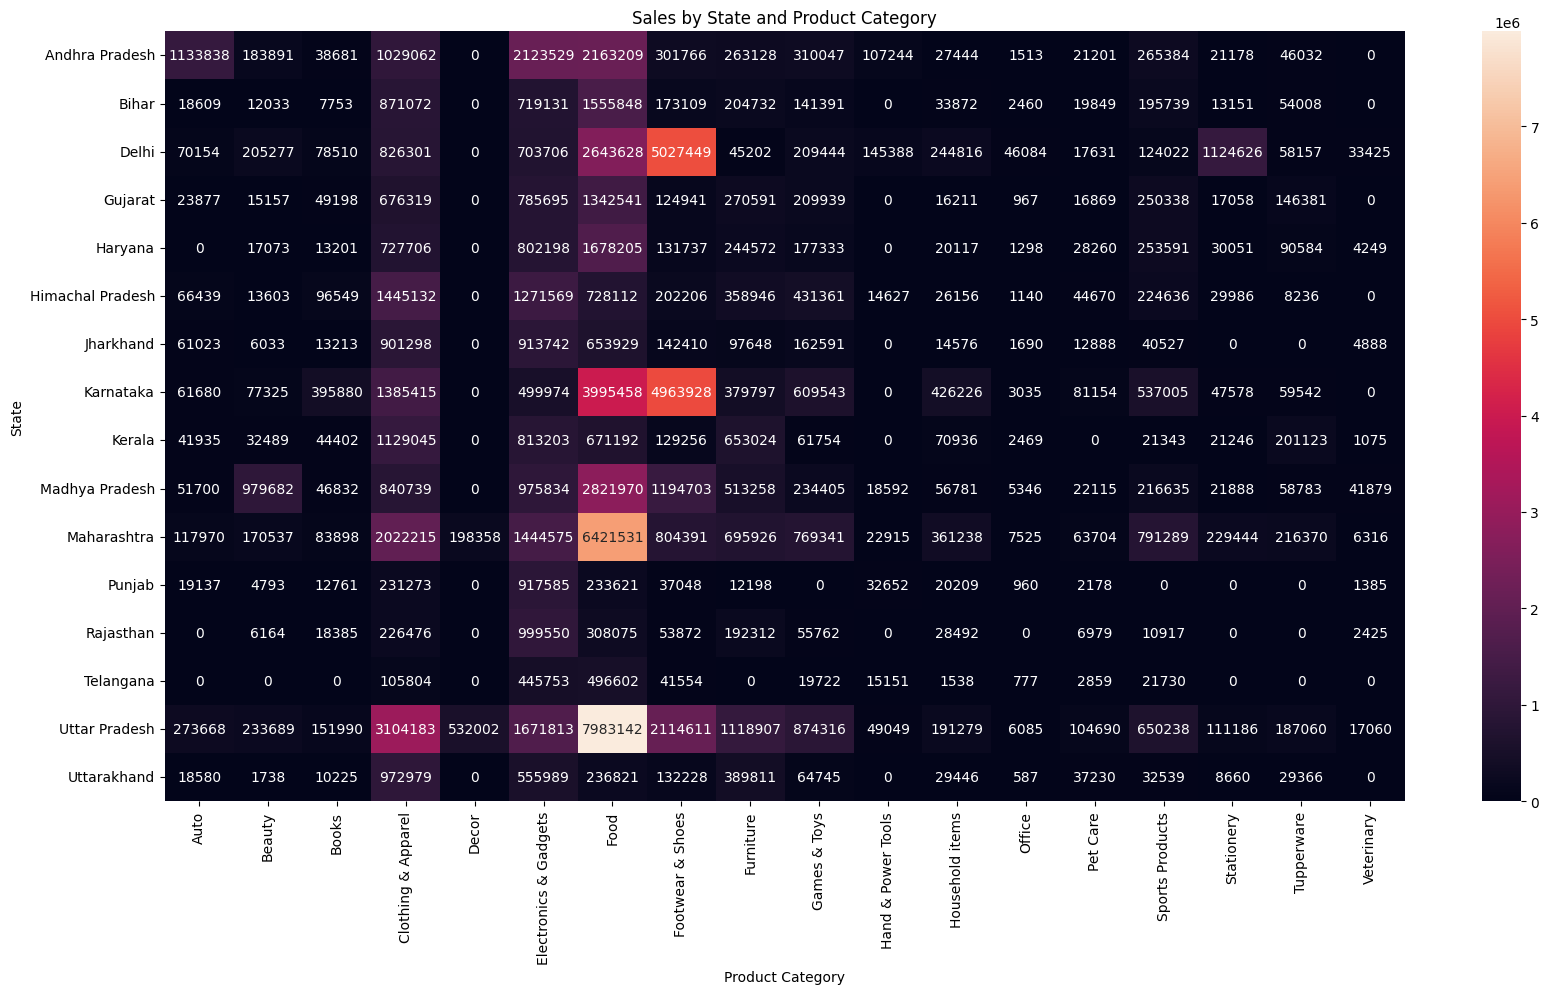

In [64]:
plt.figure(figsize = (20,10))
sns.heatmap(sales_products,annot=True,fmt='.0f')
plt.title('Sales by State and Product Category')
plt.xlabel("Product Category")
plt.ylabel("State")